In [1]:
#import libraries
import pandas as pd #read csv files
import numpy as np #numeric date(mean)
import seaborn as sns #visualization
from matplotlib import pyplot as plt #plot


In [2]:
import pandas as pd

# Read the Excel files
data_excel = pd.read_excel("C:\\Users\\Touhe\\ALL_LAKES_EQUATIONS_CDOM\\LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("C:\\Users\\Touhe\\ALL_LAKES_EQUATIONS_CDOM\\TIME_SERIES_SEASONAL_VARIABILITY\\Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("C:\\Users\\Touhe\\MACHINE_LEARNING\\MACHINE LEARNING 52 LAKES\\ALTM-50-stations.xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])
data_modified = data_modified[merged_data_combined['PROGRAM_ID'] == 'LTM_ALTM']


# Display the merged DataFrame
(data_modified)


SITE_ID   DATE_SMP  DOC_MG_L PROGRAM_ID   SITE_NAME  LAKE_DEPTH_MEAN  \
0       040850 1997-09-22  3.100000   LTM_ALTM  Squaw Lake              3.4   
2       040850 1995-03-02  3.031000   LTM_ALTM  Squaw Lake              3.4   
4       040850 1996-08-19  3.595000   LTM_ALTM  Squaw Lake              3.4   
6       040850 2003-11-06  4.232000   LTM_ALTM  Squaw Lake              3.4   
8       040850 2005-07-11  3.344000   LTM_ALTM  Squaw Lake              3.4   
...        ...        ...       ...        ...         ...              ...   
17863  1A3-048 2011-05-18  4.283944   LTM_ALTM  Grass Pond              1.5   
17864  1A3-048 2015-06-10  5.509394   LTM_ALTM  Grass Pond              1.5   
17865  1A3-048 2016-07-14  4.884900   LTM_ALTM  Grass Pond              1.5   
17866  1A3-048 2016-09-15  6.344000   LTM_ALTM  Grass Pond              1.5   
17867  1A3-048 2017-05-10  4.644200   LTM_ALTM  Grass Pond              1.5   

          LATDD     LONDD  LATDD_CENT  LONDD_CENT  
0      43.63645 -74.73844    43.63276   -74.73863  
2      43.63645 -74.73844    43.63276   -74.73863  
4      43.63645 -74.73844    43.63276   -74.73863  
6      43.63645 -74.73844    43.63276   -74.73863  
8      43.63645 -74.73844    43.63276   -74.73863  
...         ...       ...         ...         ...  
17863  43.69066 -75.06462    43.69207   -75.06172  
17864  43.69066 -75.06462    43.69207   -75.06172  
17865  43.69066 -75.06462    43.69207   -75.06172  
17866  43.69066 -75.06462    43.69207   -75.06172  
17867  43.69066 -75.06462    43.69207   -75.06172  

[15821 rows x 10 columns]

In [11]:
# first_image= l5_new.first()
# band_names = first_image.bandNames().getInfo()
# print(band_names)

['blue_nir_diff', 'green_nir_diff', 'red_nir_diff', 'nir', 'LAKE_LABEL', 'swir1', 'swir2']


In [3]:
import ee
import geemap
import pandas as pd

# Authenticate and initialize the Earth Engine API
# ee.Authenticate()  # Only needed for the first time
ee.Initialize()

# Create a list of lake names
lake_names = [
    'Little Hope Pond', 'Big Hope Pond', 'East Copperas Pond', 'Sunday Pond', 'Sochia Pond',
    'Grass Pond (3)', 'Little Clear Pond', 'Loon Hollow Pond', 'Willys Lake', 'Woods Lake',
    'Middle Settlement Lake', 'Middle Branch Lake', 'Limekiln Lake', 'Squaw Lake', 'Indian Lake',
    'Brook Trout Lake', 'Lost Pond', 'North Lake', 'Willis Lake', 'Long Pond', 'Carry Pond',
    'Lake Colden', 'Avalanche Lake', 'Little Simon Pond', 'Raquette Lake Reservoir', 'G Lake',
    'Constable Pond', 'Middle Pond', 'Arbutus Pond', 'Sagamore Lake', 'Black Pond', 'Windfall Pond',
    'Queer Lake', 'Heart Lake', 'Big Moose Lake', 'Cascade Lake', 'Dart Lake', 'Little Echo Pond',
    'Moss Lake', 'Lake Rondaxe', 'Squash Pond', 'West Pond', 'Owen Pond', 'Jockeybush Lake',
    'Barnes Lake', 'Clear Pond', 'Otter Lake', 'Nate Pond', 'Grass Pond', 'South Lake (East Branch)'
]

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']




def normalizedBands(image):
    # Calculate the differences between NIR and other bands
    nir = image.select('SR_B4').rename('nir')
    blue_nir_diff = nir.subtract(image.select('SR_B1')).rename('blue_nir_diff')
    green_nir_diff = nir.subtract(image.select('SR_B2')).rename('green_nir_diff')
    red_nir_diff = nir.subtract(image.select('SR_B3')).rename('red_nir_diff')
    lake_label = nir.multiply(0).add(34).rename('LAKE_LABEL')
    image = image.addBands(nir, ['nir'], True)

    return image.addBands(blue_nir_diff, None, True).addBands(green_nir_diff, None, True).addBands(red_nir_diff, None, True).addBands(lake_label, None, True)

new_bands= ['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL','SR_B5','SR_B7']
STD_NEW= ['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL','swir1','swir2']

# l5_new = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
#         .filter(ee.Filter.calendarRange(5, 12, 'month')) \
#         .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
#         .filterBounds(entire_lake) \
#         .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
#         .map(maskL457sr) \
#         .map(normalizedBands)\
#         .select(new_bands,STD_NEW)


# Define the function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    qa = image.select('QA_PIXEL')
    cloud = qa.bitwiseAnd(1 << 5).Or(qa.bitwiseAnd(1 << 7)).Or(qa.bitwiseAnd(1 << 3))
    masked = image.updateMask(cloud.Not())
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(masked).updateMask(qaMask).updateMask(saturationMask)

# Define the function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).select(STD_NEW)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve Landsat 5 imagery for the specific lake
    lake = ee.FeatureCollection('projects/ee-touhedakhanom14/assets/stations-coord')\
        .filter(ee.Filter.eq('SITE_NAME', SITE_NAME))

    l5_new = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .map(normalizedBands)\
        .select(new_bands,STD_NEW)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5_new.map(lambda img: reflectance(img, lake))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)

# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

# Display the DataFrame containing reflectance values for all lakes with separate columns for each lake
# print(df_all_lakes)


C:\Users\Touhe\AppData\Local\Temp\ipykernel_5880\390110789.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
C:\Users\Touhe\AppData\Local\Temp\ipykernel_5880\390110789.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
C:\Users\Touhe\AppData\Local\Temp\ipykernel_5880\390110789.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)
C:\Users\Touhe\AppData\Local\Temp\

In [4]:
# Remove rows with NaN values
#df_all_lakes.drop('reflectance', axis=1, inplace=True)

df_all_lakes = df_all_lakes.dropna()

df_all_lakes

DATE_SMP  LAKE_LABEL  blue_nir_diff  green_nir_diff       nir  \
3828  1985-07-13          25       0.023155        0.022468  0.045272   
7174  1985-07-13          41       0.080052        0.069630  0.096505   
4232  1985-07-13          27       0.019360        0.015015  0.050030   
4453  1985-07-13          28       0.027858        0.018755  0.049508   
4614  1985-07-13          29       0.016857        0.010807  0.031330   
...          ...         ...            ...             ...       ...   
3761  2011-10-09          24       0.056100        0.051837  0.080527   
3669  2011-10-09          24       0.054532        0.047272  0.075632   
7360  2011-10-09          41       0.061380        0.057172  0.080665   
3353  2011-10-09          22       0.108350        0.103868  0.129698   
3251  2011-10-09          21       0.125757        0.114538  0.143998   

      red_nir_diff     swir1     swir2                SITE_NAME  
3828      0.027665  0.013097  0.008835                   G Lake  
7174      0.075350  0.055173  0.019423                West Pond  
4232      0.018618  0.033227  0.019505              Middle Pond  
4453      0.024888  0.023190  0.015902             Arbutus Pond  
4614      0.019085  0.008340  0.005452            Sagamore Lake  
...            ...       ...       ...                      ...  
3761      0.051727  0.078850  0.036362  Raquette Lake Reservoir  
3669      0.051150  0.068922  0.036417  Raquette Lake Reservoir  
7360      0.055990  0.052395  0.022172                West Pond  
3353      0.099688  0.059160  0.027012           Avalanche Lake  
3251      0.118938  0.079097  0.036527              Lake Colden  

[3806 rows x 9 columns]

In [5]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

In [6]:
data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


In [ ]:
# merged_df = pd.merge(df_all_lakes, data_modified, on='lake_name')


In [ ]:
# Drop rows where the 'Reflectance' column is null
# merged_data = merged_data.dropna(subset=['Reflectance'])

# Display the updated DataFram
#merged_data

In [ ]:
#merged_data

# WITH LAKE LABEL AS FEATURES 1 day window

In [7]:
# Create the 1-day time window
window_size_1 = pd.Timedelta(days=1)

# Merge data within the 3-day time window
# merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=None, tolerance=window_size)

merged_data_1 = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by='SITE_NAME', tolerance=window_size_1)

# Drop rows where the 'Reflectance' column is null
merged_data_1 = merged_data_1.dropna(subset=['blue_nir_diff'])

merged_data_1 = merged_data_1.dropna(subset=['DOC_MG_L'])

merged_data_1 = merged_data_1[merged_data_1['PROGRAM_ID'] == 'LTM_ALTM']
merged_data_1 = merged_data_1.dropna(subset=['LAKE_DEPTH_MEAN'])


# Display the updated DataFrame
# print(merged_data)
merged_data_1




SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
827     040850 1991-07-31   2.900000   LTM_ALTM        Squaw Lake   
840    1A1-107 1991-09-09  11.900000   LTM_ALTM  Little Echo Pond   
...        ...        ...        ...        ...               ...   
12145   070859 2011-07-05   2.975390   LTM_ALTM            G Lake   
12147   040874 2011-07-05   2.758203   LTM_ALTM  Brook Trout Lake   
12149  1A1-059 2011-07-06   9.051604   LTM_ALTM     Sagamore Lake   
12150   040186 2011-07-06   6.310251   LTM_ALTM  Loon Hollow Pond   
12167  1A1-112 2011-07-14   7.723689   LTM_ALTM         West Pond   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  \
262                9.2  43.99568 -73.83082    43.99719   -73.82435   
264                2.8  43.98230 -74.23556    43.98787   -74.24151   
265                5.1  44.18050 -73.96726    44.18229   -73.96920   
827                3.4  43.63645 -74.73844    43.63276   -74.73863   
840                2.9  44.30576 -74.35721    44.30849   -74.35564   
...                ...       ...       ...         ...         ...   
12145              4.5  43.41862 -74.63616    43.41421   -74.63251   
12147              8.4  43.59990 -74.66236    43.60298   -74.66308   
12149             10.5  43.76605 -74.62837    43.76758   -74.61935   
12150              3.4  43.96360 -75.04253    43.96292   -75.04305   
12167              1.5  43.81189 -74.88296    43.81102   -74.87937   

       LAKE_LABEL  blue_nir_diff  green_nir_diff       nir  red_nir_diff  \
262          45.0       0.028765        0.023347  0.045437      0.025520   
264          28.0       0.019745        0.015098  0.034823      0.023540   
265          33.0       0.017683        0.014438  0.034493      0.020268   
827          13.0       0.028655        0.022083  0.044805      0.029480   
840          37.0       0.044577        0.039600  0.088970      0.046063   
...           ...            ...             ...       ...           ...   
12145        25.0       0.054615        0.046557  0.087925      0.058410   
12147        15.0       0.061078        0.046613  0.095405      0.060280   
12149        29.0       0.029453        0.028408  0.053935      0.033358   
12150         7.0       0.032175        0.020020  0.047692      0.031488   
12167        41.0       0.116462        0.109010  0.132557      0.113630   

          swir1     swir2  
262    0.007900  0.005260  
264    0.010650  0.005370  
265    0.007873 -0.001918  
827    0.013978  0.005727  
840    0.041972  0.022970  
...         ...       ...  
12145  0.026188  0.007075  
12147  0.023383  0.017580  
12149  0.022888  0.011283  
12150  0.018432  0.008010  
12167  0.062955  0.028993  

[188 rows x 17 columns]

**************Data Points Used***************************
Number of rows: 188
Number of columns: 7
*************Predicted Training data (RandomForest)***************
       blue_nir_diff  green_nir_diff  red_nir_diff       nir  LAKE_LABEL  \
2807        0.016032        0.018755      0.022907  0.029625         0.0   
7512        0.024090        0.027362      0.032807  0.046097         0.0   
3139        0.030305        0.030635      0.036492  0.058472         2.0   
2621        0.021670        0.012788      0.022797  0.042660         2.0   
8695        0.014025        0.016747      0.019635  0.027975         2.0   
...              ...             ...           ...       ...         ...   
10992       0.053707        0.043835      0.051012  0.081792        49.0   
8683        0.016610        0.019855      0.027308  0.036170        49.0   
9891        0.038005        0.033303      0.042928  0.058418        49.0   
8037        0.018068        0.009598      0.020350  0.031468        49.0  

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


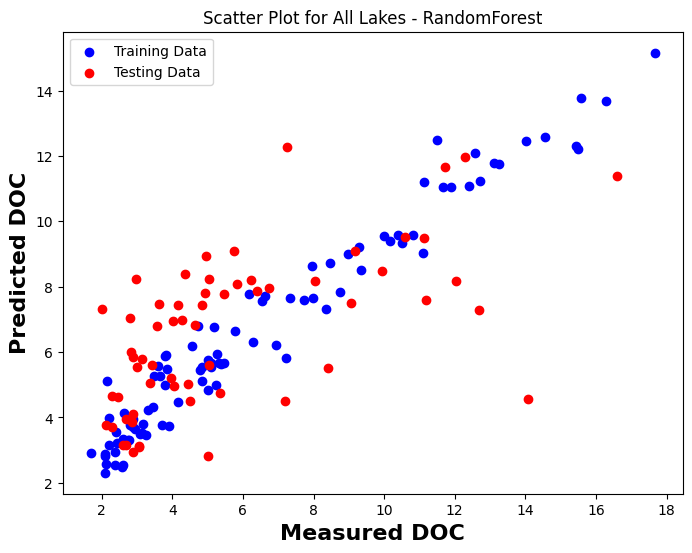

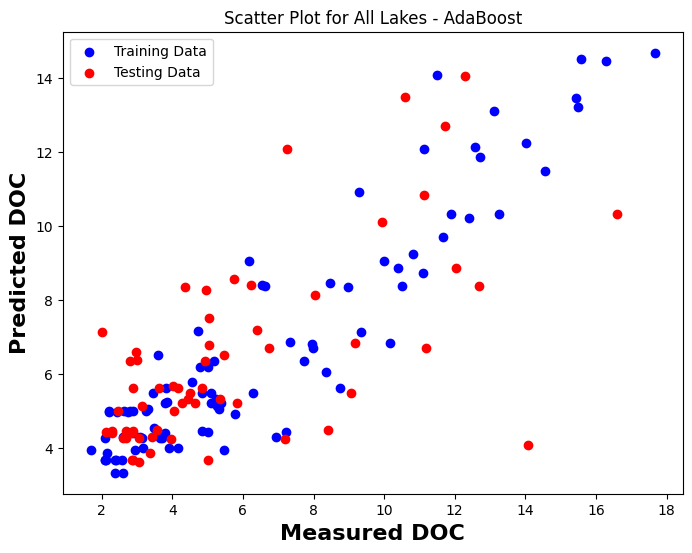

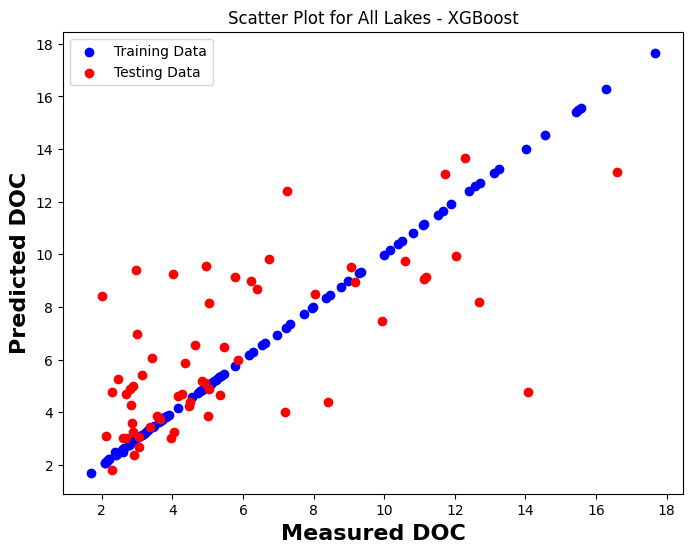

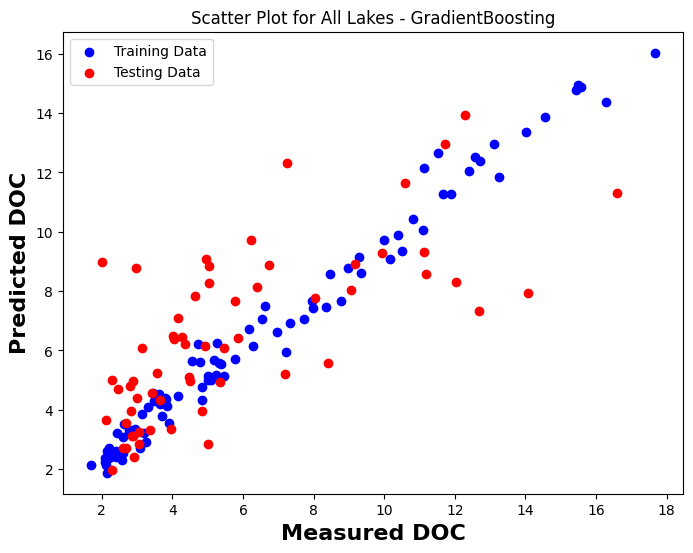

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 7
[LightGBM] [Info] Start training from score 6.507468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

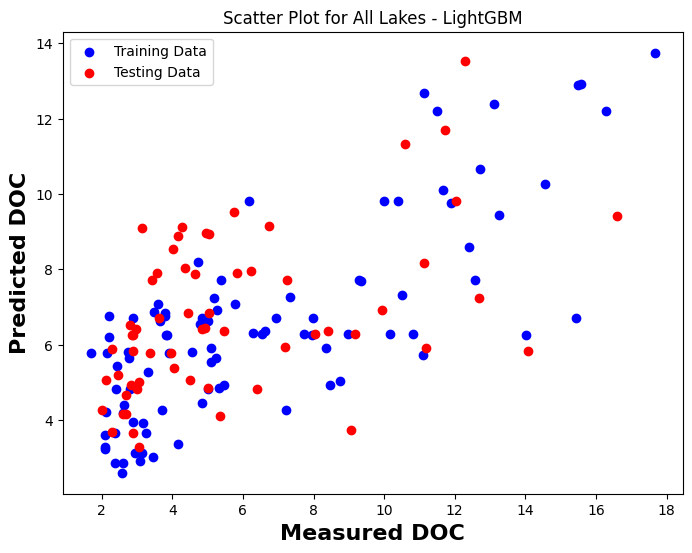

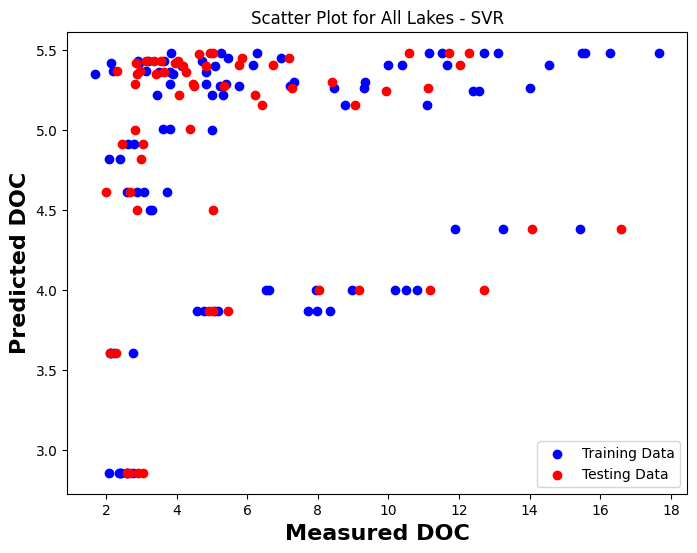

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


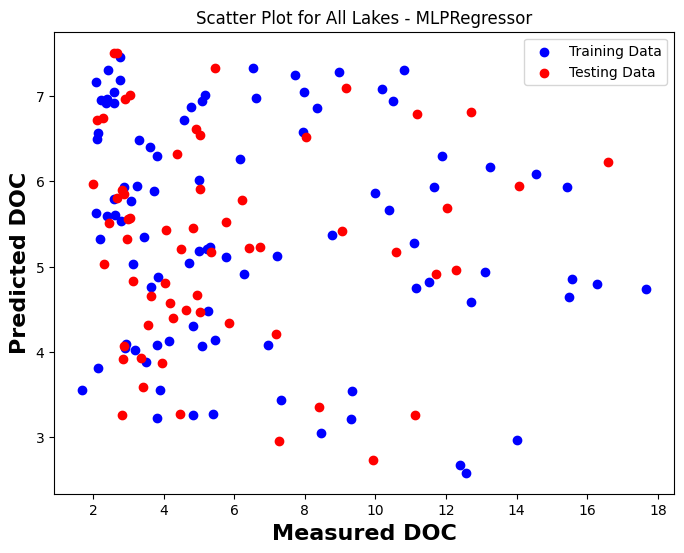

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# Preparing the training data
X = merged_data_1[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL','swir1','swir2']]  # Features
y = merged_data_1['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_1.groupby('LAKE_LABEL')



# Minimum number of samples required for splitting
min_samples = 3 #Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL','swir1','swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE LABEL AS FEATURES 1 day window/n')
print(evaluation_df_all)

# # Plot the scatter plot for all lakes combined
# plt.scatter( data_train['original_DOC'],data_train['predicted_DOC'], color='blue', label='Training Data')
# plt.scatter( data_test['original_DOC'],data_test['predicted_DOC'], color='red', label='Testing Data')

# # Set plot title and labels
# plt.title('Scatter Plot for All Lakes Without Lake_label')
# plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
# plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
# plt.legend()

# # Show the plot
# plt.show()


# Plot the scatter plot for all lakes combined for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
    plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
    
    plt.title(f'Scatter Plot for All Lakes - {model_name}')
    plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
    plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()


# WITHOUT LAKE LABEL AS FEATURES for 1 day window

**************Data Points Used***************************
Number of rows: 188
Number of columns: 5
*************Predicted Training data (RandomForest)***************
       blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
2807        0.016032        0.018755      0.022907  0.029625  0.005397   
7512        0.024090        0.027362      0.032807  0.046097  0.007845   
3139        0.030305        0.030635      0.036492  0.058472  0.030972   
2621        0.021670        0.012788      0.022797  0.042660  0.019560   
8695        0.014025        0.016747      0.019635  0.027975  0.006855   
...              ...             ...           ...       ...       ...   
10992       0.053707        0.043835      0.051012  0.081792  0.036197   
8683        0.016610        0.019855      0.027308  0.036170  0.017882   
9891        0.038005        0.033303      0.042928  0.058418  0.033612   
8037        0.018068        0.009598      0.020350  0.031468  0.015847   
9331        0.059207

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*************Predicted Training data (MLPRegressor)***************
       blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
2807        0.016032        0.018755      0.022907  0.029625  0.005397   
7512        0.024090        0.027362      0.032807  0.046097  0.007845   
3139        0.030305        0.030635      0.036492  0.058472  0.030972   
2621        0.021670        0.012788      0.022797  0.042660  0.019560   
8695        0.014025        0.016747      0.019635  0.027975  0.006855   
...              ...             ...           ...       ...       ...   
10992       0.053707        0.043835      0.051012  0.081792  0.036197   
8683        0.016610        0.019855      0.027308  0.036170  0.017882   
9891        0.038005        0.033303      0.042928  0.058418  0.033612   
8037        0.018068        0.009598      0.020350  0.031468  0.015847   
9331        0.059207        0.050105      0.058520  0.101318  0.059518   

          swir2  original_DOC  predicted_DOC

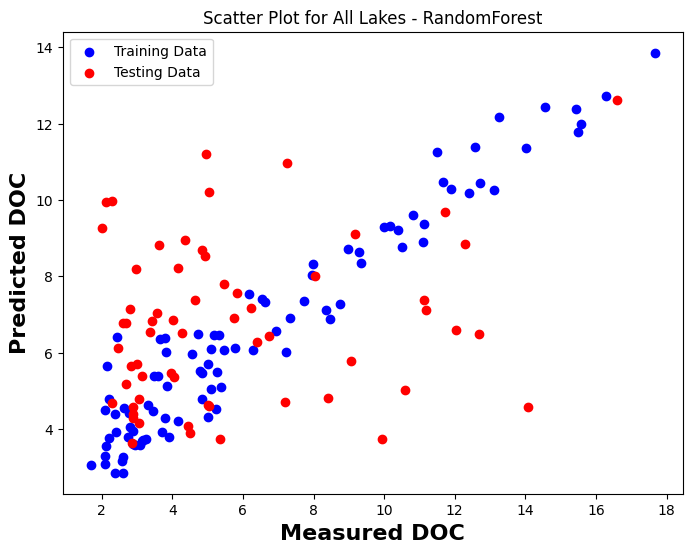

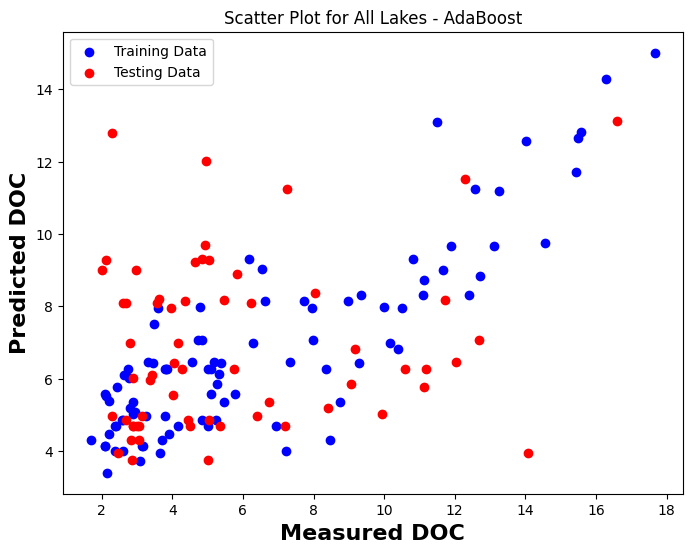

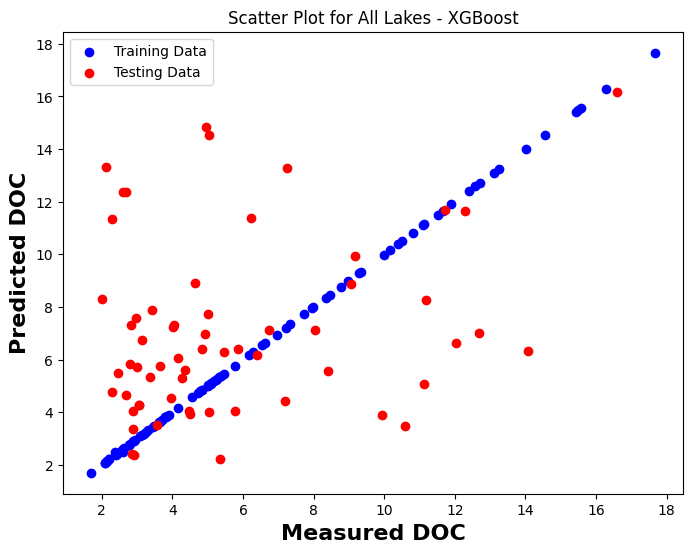

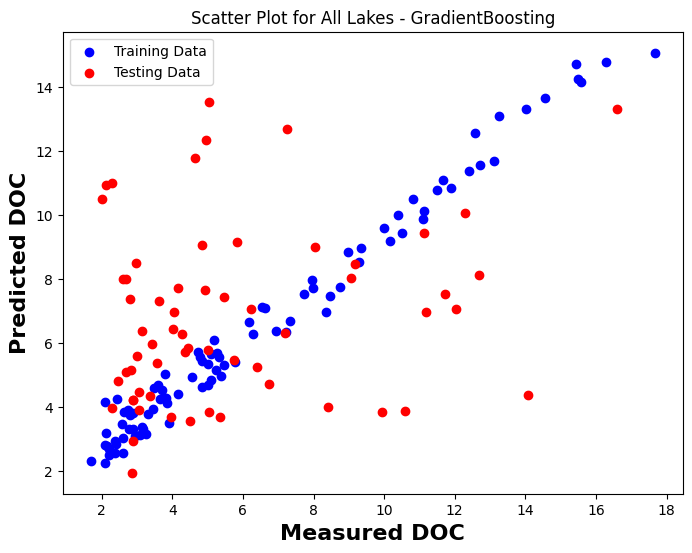

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 6
[LightGBM] [Info] Start training from score 6.507468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

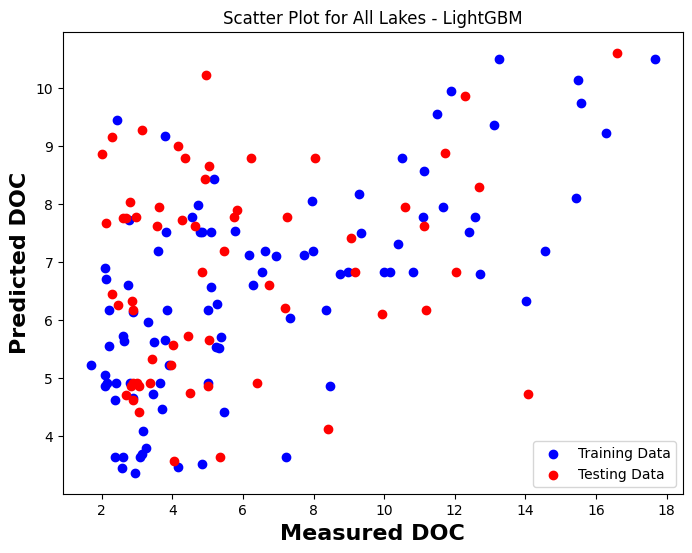

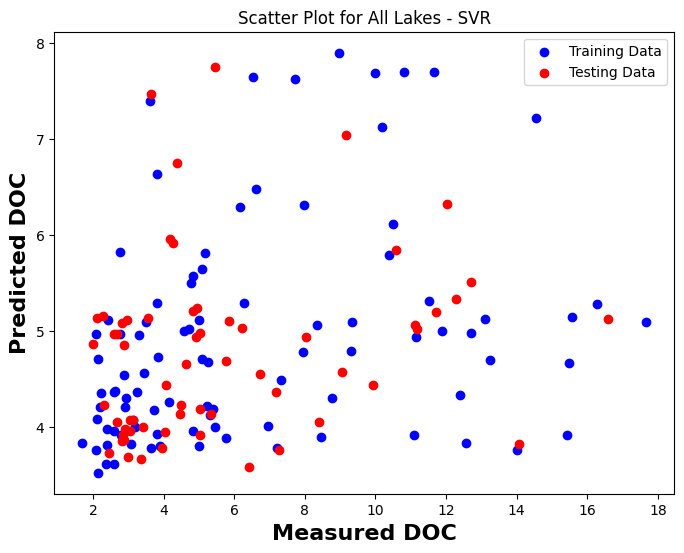

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


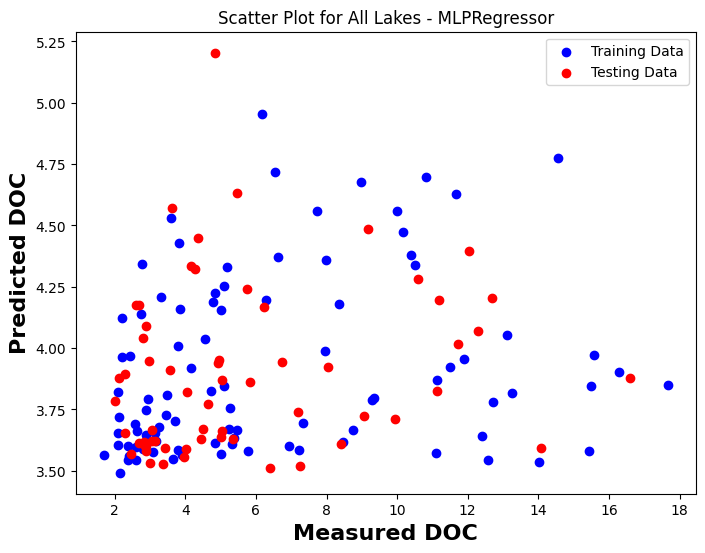

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Preparing the training data
# 'blue_nir_diff','green_nir_diff','red_nir_diff','LAKE_LABEL','swir1','swir2'
X = merged_data_1[['blue_nir_diff','green_nir_diff','red_nir_diff','swir1','swir2']]  # Features
y = merged_data_1['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_1.groupby('LAKE_LABEL')


# Minimum number of samples required for splitting
min_samples = 3 #Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','swir1','swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITHOUT LAKE LABEL AS FEATURES 1 day window/n')
print(evaluation_df_all)

# # Plot the scatter plot for all lakes combined
# plt.scatter( data_train['original_DOC'],data_train['predicted_DOC'], color='blue', label='Training Data')
# plt.scatter( data_test['original_DOC'],data_test['predicted_DOC'], color='red', label='Testing Data')

# # Set plot title and labels
# plt.title('Scatter Plot for All Lakes Without Lake_label')
# plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
# plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
# plt.legend()

# # Show the plot
# plt.show()


# Plot the scatter plot for all lakes combined for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
    plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
    
    plt.title(f'Scatter Plot for All Lakes - {model_name}')
    plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
    plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()


# WITH LAKE LABEL AS FEATURES 3 days window

In [10]:
# Create the 1-day time window
window_size_3 = pd.Timedelta(days=3)

# Merge data within the 3-day time window
# merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=None, tolerance=window_size)

merged_data_3 = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by='SITE_NAME', tolerance=window_size_3)

# Drop rows where the 'Reflectance' column is null
merged_data_3 = merged_data_3.dropna(subset=['blue_nir_diff'])

merged_data_3 = merged_data_3.dropna(subset=['DOC_MG_L'])

merged_data_3 = merged_data_3[merged_data_3['PROGRAM_ID'] == 'LTM_ALTM']
merged_data_3 = merged_data_3.dropna(subset=['LAKE_DEPTH_MEAN'])


# Display the updated DataFrame
# print(merged_data)
merged_data_3


# 'blue_nir_diff','green_nir_diff','red_nir_diff','LAKE_LABEL','swir1','swir2'


SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID       SITE_NAME  \
262    1A2-077 1985-07-22   3.300000   LTM_ALTM      Clear Pond   
264    1A1-052 1985-07-22   5.000000   LTM_ALTM    Arbutus Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM      Heart Lake   
352    1A1-110 1986-06-17   3.300000   LTM_ALTM    Lake Rondaxe   
827     040850 1991-07-31   2.900000   LTM_ALTM      Squaw Lake   
...        ...        ...        ...        ...             ...   
12202   040887 2011-08-02   8.752820   LTM_ALTM       Lost Pond   
12206  1A1-110 2011-08-02   6.439215   LTM_ALTM    Lake Rondaxe   
12308  1A1-087 2011-10-12   4.025449   LTM_ALTM   Windfall Pond   
12309   050707 2011-10-12  10.553219   LTM_ALTM  Avalanche Lake   
12311   050706 2011-10-12   6.355868   LTM_ALTM     Lake Colden   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  \
262                9.2  43.99568 -73.83082    43.99719   -73.82435   
264                2.8  43.98230 -74.23556    43.98787   -74.24151   
265                5.1  44.18050 -73.96726    44.18229   -73.96920   
352                3.0  43.76088 -74.91592    43.76697   -74.90136   
827                3.4  43.63645 -74.73844    43.63276   -74.73863   
...                ...       ...       ...         ...         ...   
12202              0.7  43.64643 -74.56177    43.64652   -74.55696   
12206              3.0  43.76088 -74.91592    43.76697   -74.90136   
12308              3.2  43.80497 -74.83077    43.80529   -74.82890   
12309              3.3  44.13056 -73.96983    44.13287   -73.96681   
12311              2.3  44.11938 -73.98261    44.12266   -73.97953   

       LAKE_LABEL  blue_nir_diff  green_nir_diff       nir  red_nir_diff  \
262          45.0       0.028765        0.023347  0.045437      0.025520   
264          28.0       0.019745        0.015098  0.034823      0.023540   
265          33.0       0.017683        0.014438  0.034493      0.020268   
352          39.0       0.023677        0.018672  0.049012      0.024255   
827          13.0       0.028655        0.022083  0.044805      0.029480   
...           ...            ...             ...       ...           ...   
12202        16.0       0.060308        0.055193  0.077887      0.053542   
12206        39.0       0.025438        0.016528  0.031192      0.022770   
12308        31.0       0.051480        0.047135  0.075798      0.051123   
12309        22.0       0.108350        0.103868  0.129698      0.099688   
12311        21.0       0.125757        0.114538  0.143998      0.118938   

          swir1     swir2  
262    0.007900  0.005260  
264    0.010650  0.005370  
265    0.007873 -0.001918  
352    0.016535  0.011695  
827    0.013978  0.005727  
...         ...       ...  
12202  0.055117  0.026408  
12206  0.006690  0.001162  
12308  0.039057  0.017388  
12309  0.059160  0.027012  
12311  0.079097  0.036527  

[369 rows x 17 columns]

In [ ]:
#pip install xgboost


In [ ]:
#pip install lightgbm


**************Data Points Used***************************
Number of rows: 369
Number of columns: 7
*************Predicted Training data (RandomForest)***************
       blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
2807        0.016032        0.018755      0.022907  0.029625  0.005397   
7512        0.024090        0.027362      0.032807  0.046097  0.007845   
3139        0.030305        0.030635      0.036492  0.058472  0.030972   
2621        0.021670        0.012788      0.022797  0.042660  0.019560   
8695        0.014025        0.016747      0.019635  0.027975  0.006855   
...              ...             ...           ...       ...       ...   
10992       0.053707        0.043835      0.051012  0.081792  0.036197   
8683        0.016610        0.019855      0.027308  0.036170  0.017882   
9891        0.038005        0.033303      0.042928  0.058418  0.033612   
8037        0.018068        0.009598      0.020350  0.031468  0.015847   
9331        0.059207

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*************Predicted Training data (MLPRegressor)***************
       blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
2807        0.016032        0.018755      0.022907  0.029625  0.005397   
7512        0.024090        0.027362      0.032807  0.046097  0.007845   
3139        0.030305        0.030635      0.036492  0.058472  0.030972   
2621        0.021670        0.012788      0.022797  0.042660  0.019560   
8695        0.014025        0.016747      0.019635  0.027975  0.006855   
...              ...             ...           ...       ...       ...   
10992       0.053707        0.043835      0.051012  0.081792  0.036197   
8683        0.016610        0.019855      0.027308  0.036170  0.017882   
9891        0.038005        0.033303      0.042928  0.058418  0.033612   
8037        0.018068        0.009598      0.020350  0.031468  0.015847   
9331        0.059207        0.050105      0.058520  0.101318  0.059518   

          swir2  original_DOC  predicted_DOC

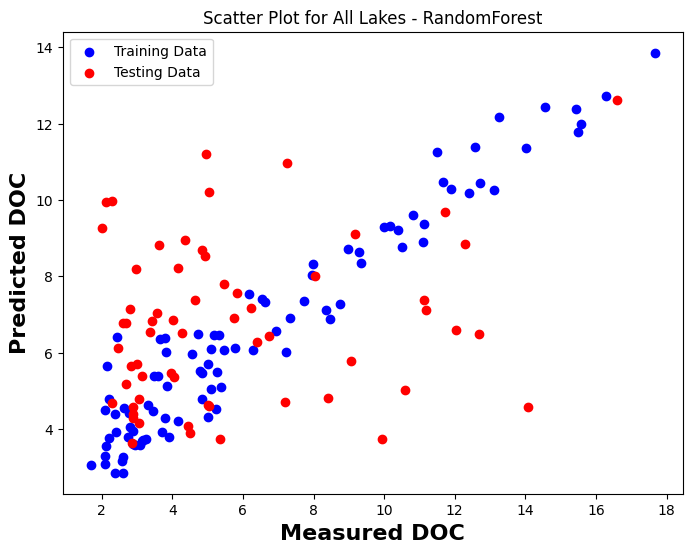

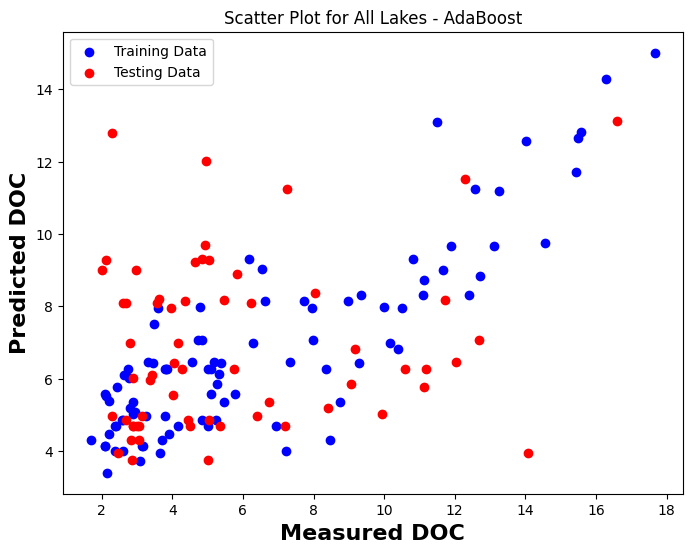

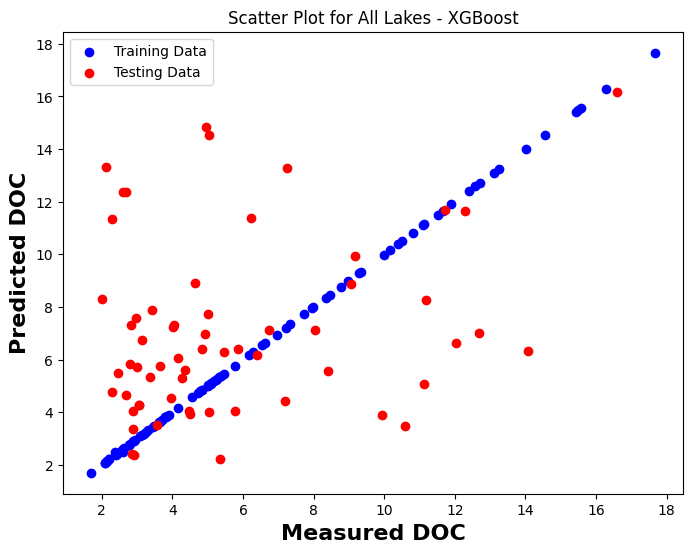

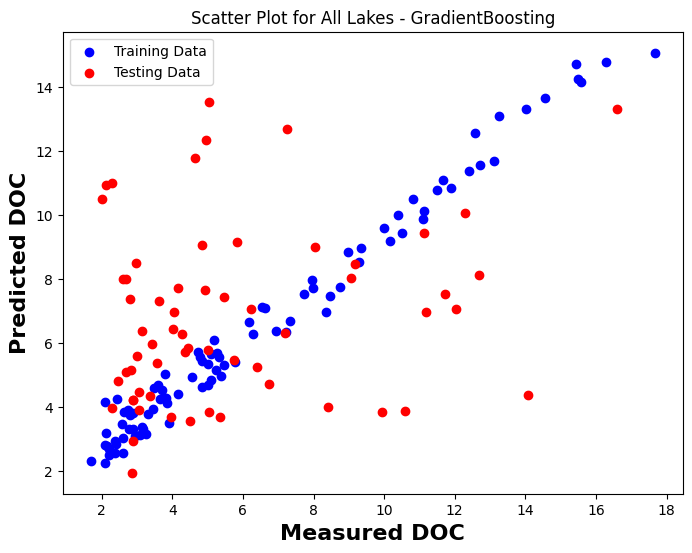

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 190
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 6
[LightGBM] [Info] Start training from score 6.507468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

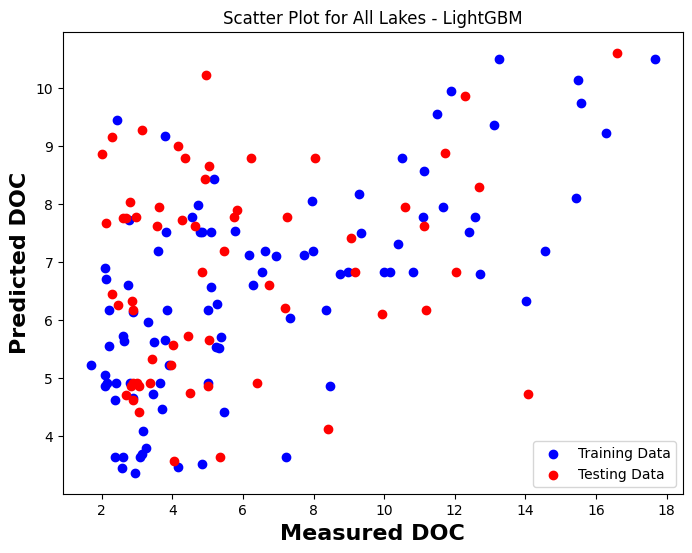

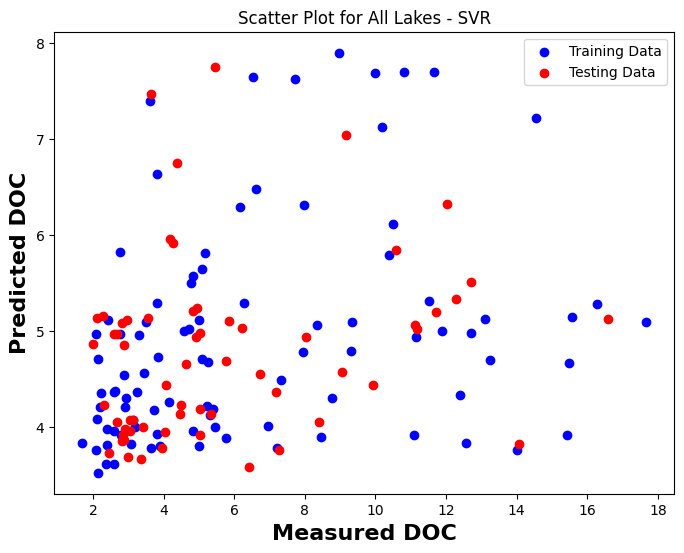

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


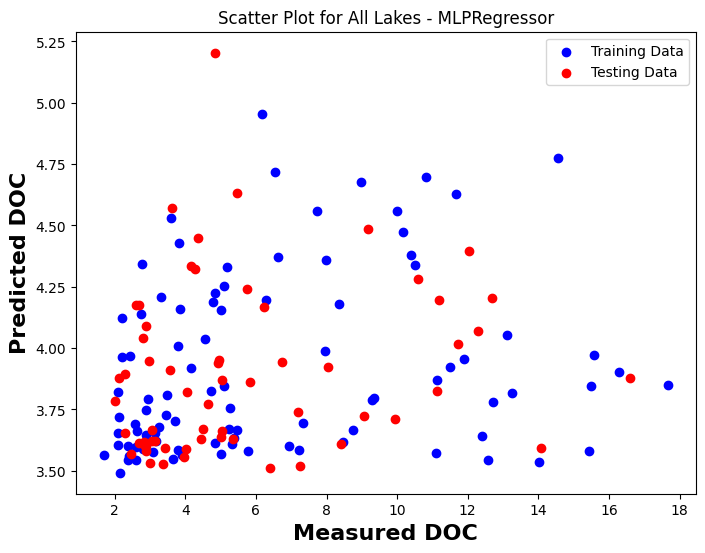

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Preparing the training data
X = merged_data_3[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL','swir1','swir2']]  # Features
y = merged_data_3['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_1.groupby('LAKE_LABEL')


# Minimum number of samples required for splitting
min_samples = 3 #Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','swir1','swir2']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE LABEL AS FEATURES 3 day window/n')
print(evaluation_df_all)

# # Plot the scatter plot for all lakes combined
# plt.scatter( data_train['original_DOC'],data_train['predicted_DOC'], color='blue', label='Training Data')
# plt.scatter( data_test['original_DOC'],data_test['predicted_DOC'], color='red', label='Testing Data')

# # Set plot title and labels
# plt.title('Scatter Plot for All Lakes Without Lake_label')
# plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
# plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
# plt.legend()

# # Show the plot
# plt.show()


# Plot the scatter plot for all lakes combined for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
    plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
    
    plt.title(f'Scatter Plot for All Lakes - {model_name}')
    plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
    plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()

# WITHOUT LAKE LABEL AS FEATURES 3 days window

**************Data Points Used***************************
Number of rows: 369
Number of columns: 6
*************Predicted Training data (RandomForest)***************
      blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
9204       0.049472        0.046447      0.065367  0.120540  0.016508   
3145       0.033633        0.027308      0.034128  0.060453  0.036747   
7932       0.014465        0.014162      0.017820  0.033557  0.015187   
7512       0.024090        0.027362      0.032807  0.046097  0.007845   
7509       0.024502        0.022687      0.032175  0.041340  0.007818   
...             ...             ...           ...       ...       ...   
8683       0.016610        0.019855      0.027308  0.036170  0.017882   
9873       0.050188        0.043423      0.052553  0.070958  0.017168   
9891       0.038005        0.033303      0.042928  0.058418  0.033612   
6744       0.031983        0.022990      0.030415  0.048050  0.022530   
8528       0.038115        0.03

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*************Predicted Training data (MLPRegressor)***************
      blue_nir_diff  green_nir_diff  red_nir_diff       nir     swir1  \
9204       0.049472        0.046447      0.065367  0.120540  0.016508   
3145       0.033633        0.027308      0.034128  0.060453  0.036747   
7932       0.014465        0.014162      0.017820  0.033557  0.015187   
7512       0.024090        0.027362      0.032807  0.046097  0.007845   
7509       0.024502        0.022687      0.032175  0.041340  0.007818   
...             ...             ...           ...       ...       ...   
8683       0.016610        0.019855      0.027308  0.036170  0.017882   
9873       0.050188        0.043423      0.052553  0.070958  0.017168   
9891       0.038005        0.033303      0.042928  0.058418  0.033612   
6744       0.031983        0.022990      0.030415  0.048050  0.022530   
8528       0.038115        0.031707      0.030883  0.090373  0.086330   

         swir2  original_DOC  predicted_DOC  
9204  0.01

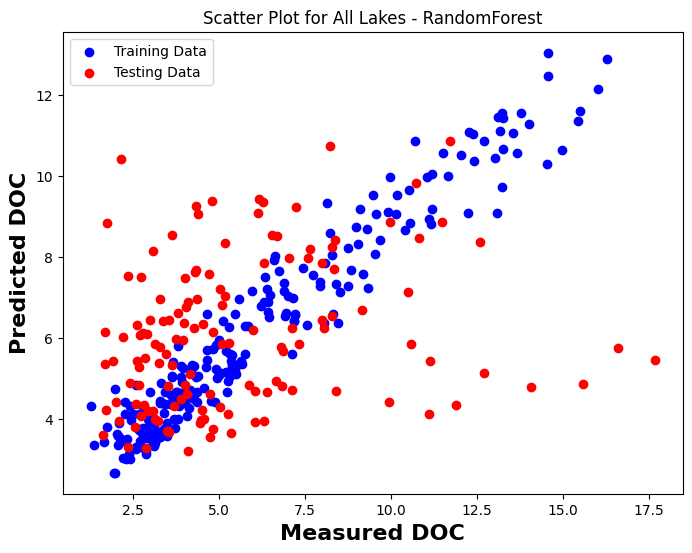

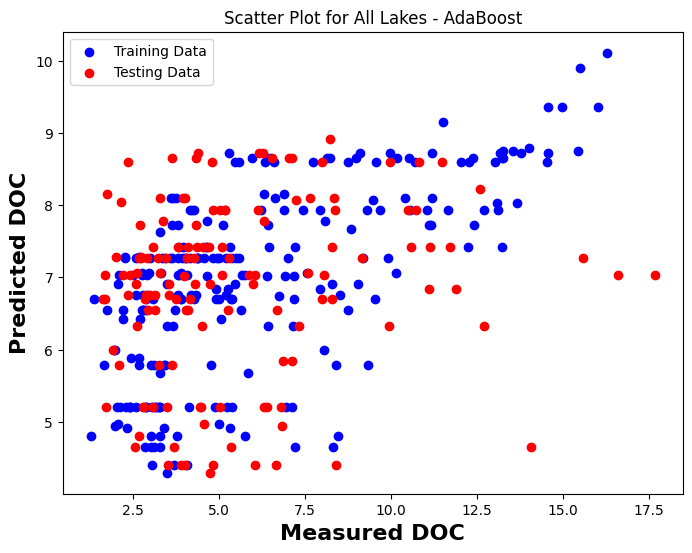

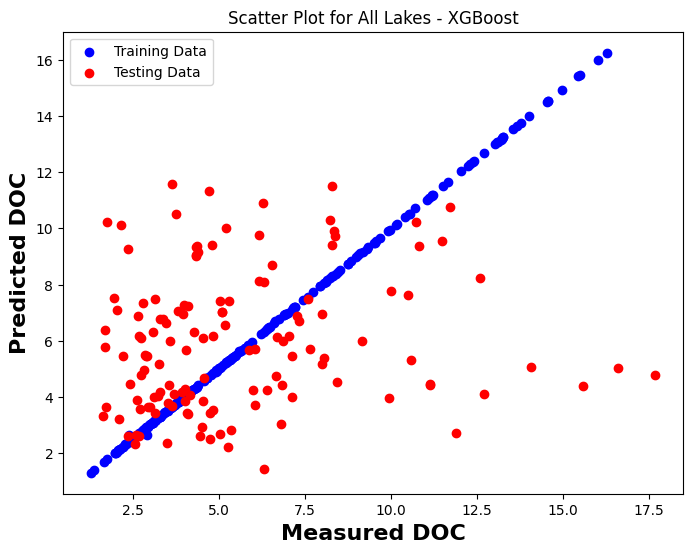

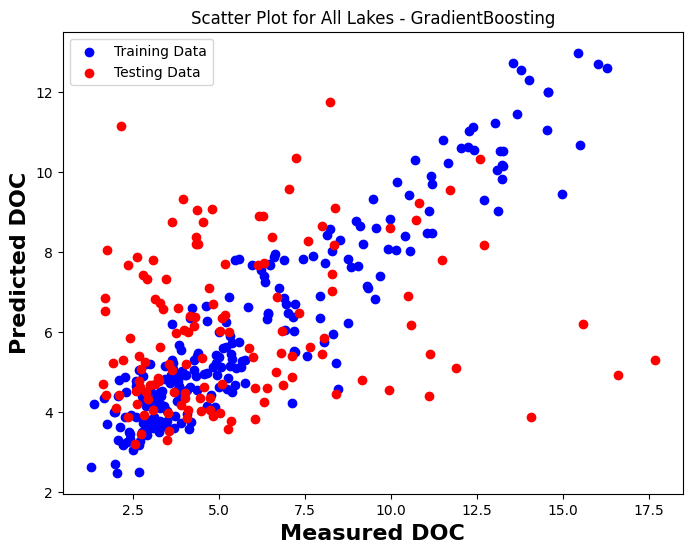

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 6
[LightGBM] [Info] Start training from score 6.103992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

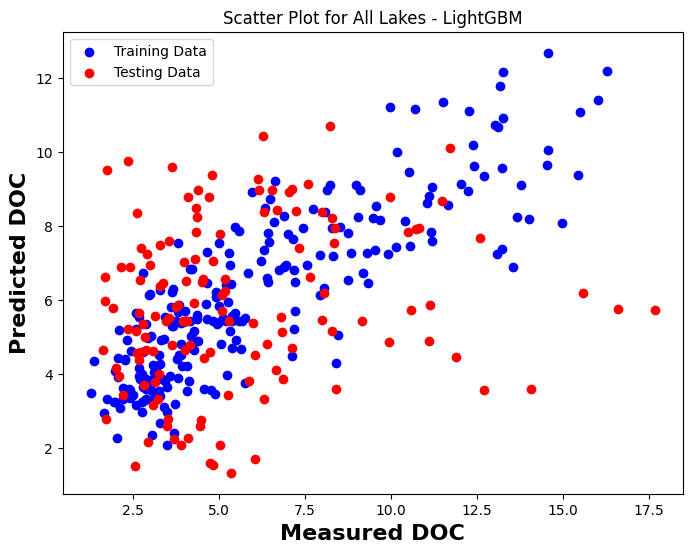

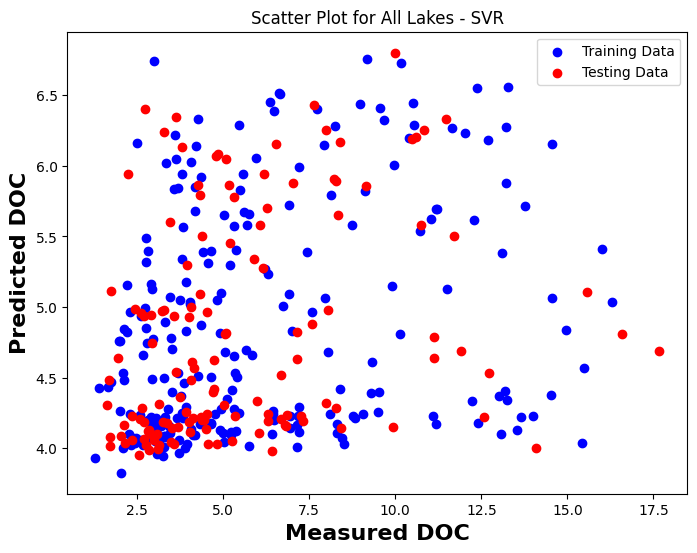

C:\Users\Touhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


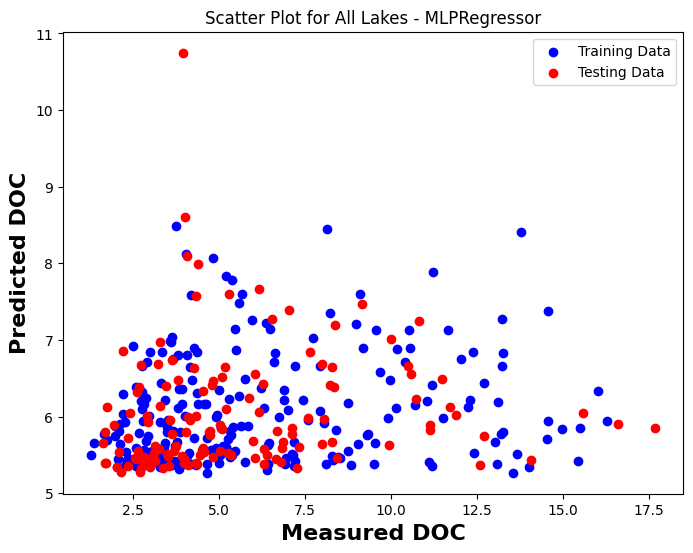

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Preparing the training data
X = merged_data_3[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','swir1','swir2']]  # Features
y = merged_data_3['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_3.groupby('LAKE_LABEL')

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Minimum number of samples required for splitting
# min_samples = 3 #Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','swir1','swir2']]
    y_lake = lake_group['DOC_MG_L']

#     if len(lake_group) >= min_samples:
    # Split data into training and testing sets for the current lake
    X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

    # Append the data for the current lake to the corresponding lists
    X_train_all.append(X_train_lake)
    X_test_all.append(X_test_lake)
    y_train_all.append(y_train_lake)
    y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITHOUT LAKE LABEL AS FEATURES 3 day window/n')
print(evaluation_df_all)

# # Plot the scatter plot for all lakes combined
# plt.scatter( data_train['original_DOC'],data_train['predicted_DOC'], color='blue', label='Training Data')
# plt.scatter( data_test['original_DOC'],data_test['predicted_DOC'], color='red', label='Testing Data')

# # Set plot title and labels
# plt.title('Scatter Plot for All Lakes Without Lake_label')
# plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
# plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
# plt.legend()

# # Show the plot
# plt.show()


# Plot the scatter plot for all lakes combined for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
    plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
    
    plt.title(f'Scatter Plot for All Lakes - {model_name}')
    plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
    plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()

# WITH LAKE LABEL AS FEATURES 7 days window

In [13]:
# Create the 7-day time window
window_size = pd.Timedelta(days=7)

# Merge data within the 3-day time window
# merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=None, tolerance=window_size)

merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by='SITE_NAME', tolerance=window_size)

# Drop rows where the 'Reflectance' column is null
merged_data = merged_data.dropna(subset=['blue_nir_diff'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data = merged_data.dropna(subset=['LAKE_DEPTH_MEAN'])


# Display the updated DataFrame
# print(merged_data)
merged_data

with pd.option_context('display.max_rows', None):
    print(merged_data)


       SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID                 SITE_NAME  \
262    1A2-077 1985-07-22   3.300000   LTM_ALTM                Clear Pond   
264    1A1-052 1985-07-22   5.000000   LTM_ALTM              Arbutus Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM                Heart Lake   
352    1A1-110 1986-06-17   3.300000   LTM_ALTM              Lake Rondaxe   
827     040850 1991-07-31   2.900000   LTM_ALTM                Squaw Lake   
828     040852 1991-08-02   3.700000   LTM_ALTM               Indian Lake   
834    1A1-052 1991-08-11   4.000000   LTM_ALTM              Arbutus Pond   
836    1A1-102 1991-08-11   2.700000   LTM_ALTM                Heart Lake   
840    1A1-107 1991-09-09  11.900000   LTM_ALTM          Little Echo Pond   
929    1A1-052 1992-06-15   6.219000   LTM_ALTM              Arbutus Pond   
935     040826 1992-06-16   3.503000   LTM_ALTM             Limekiln Lake   
936    1A1-059 1992-06-16   8.394000   LTM_ALTM             Sagamore Lake   

**************Data Points Used***************************
Number of rows: 652
Number of columns: 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 433, number of used features: 4
[LightGBM] [Info] Start training from score 5.856838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

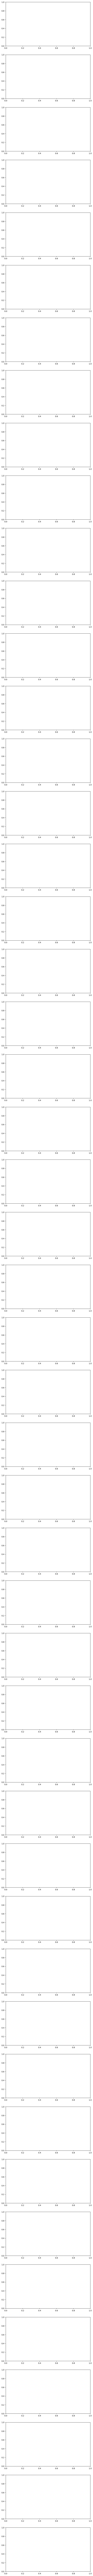

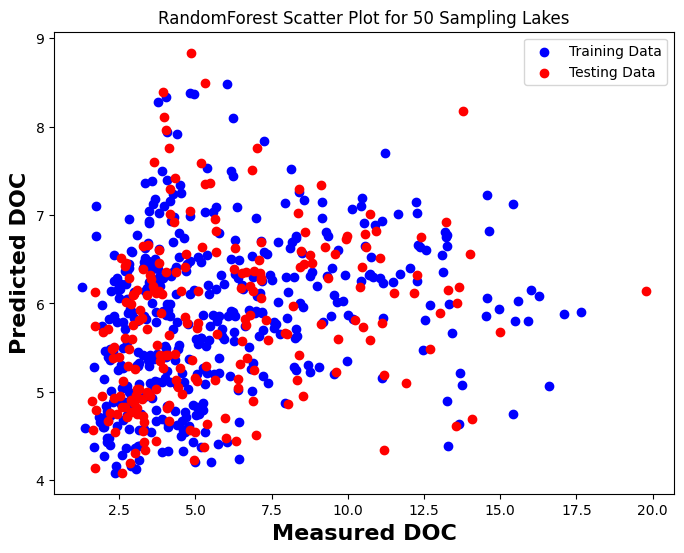

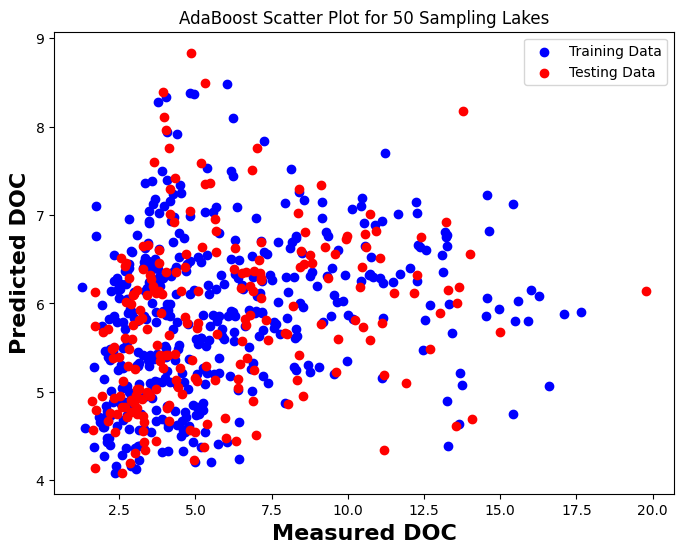

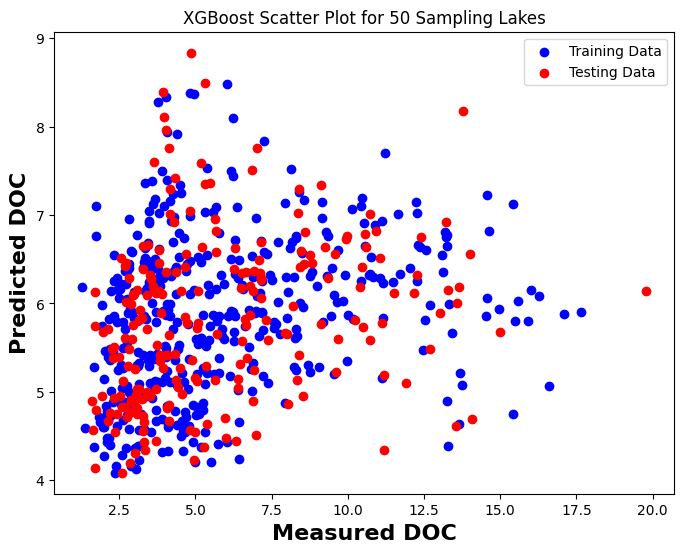

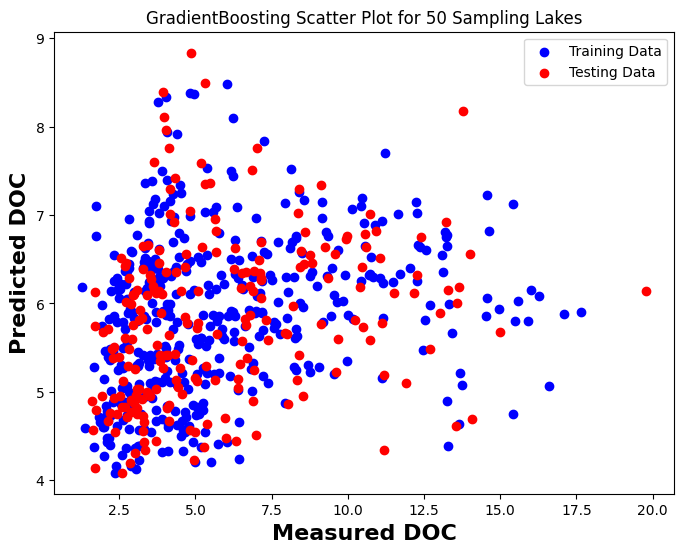

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 433, number of used features: 4
[LightGBM] [Info] Start training from score 5.856838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

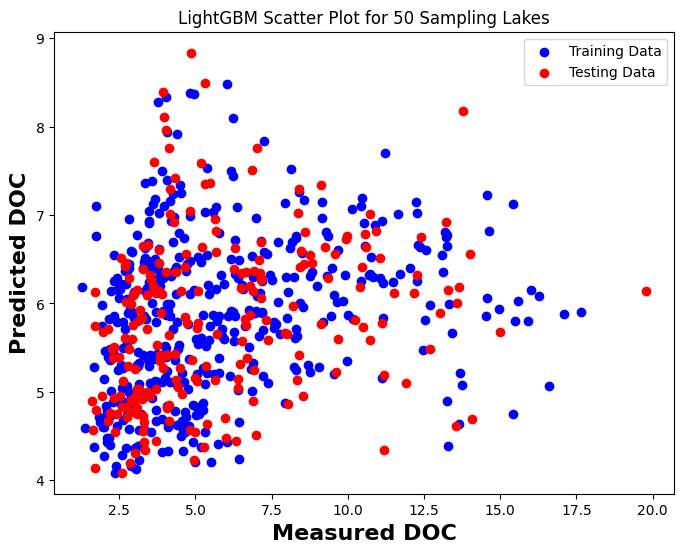

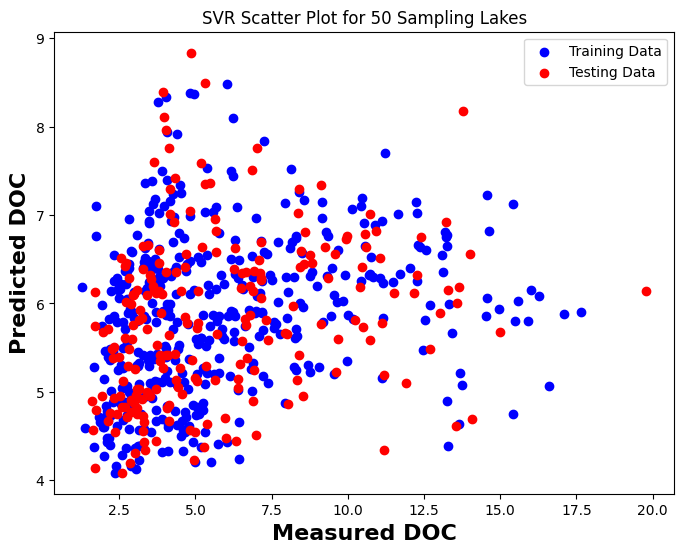

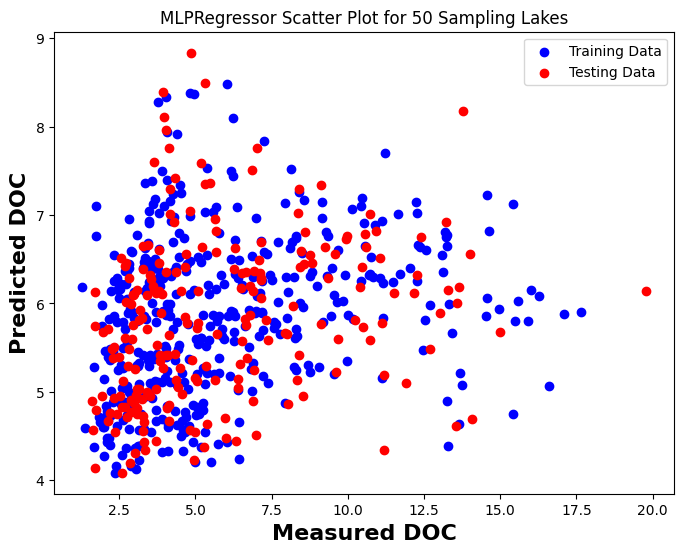

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Preparing the training data
X = merged_data[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL']]  # Features
y = merged_data['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data.groupby('LAKE_LABEL')

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL']]
    y_lake = lake_group['DOC_MG_L']
    
    # Split data into training and testing sets for the current lake
    X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)
    
    # Append the data for the current lake to the corresponding lists
    X_train_all.append(X_train_lake)
    X_test_all.append(X_test_lake)
    y_train_all.append(y_train_lake)
    y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

# Train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict DOC values for both training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = pd.DataFrame(X_train, columns=['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL'])
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = y_pred_train

data_test = pd.DataFrame(X_test, columns=['blue_nir_diff','green_nir_diff','red_nir_diff','nir','LAKE_LABEL'])
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred_test

# Get unique 'LAKE_LABEL' values
lake_labels = merged_data['LAKE_LABEL'].unique()

# Set up the subplots based on the number of unique 'LAKE_LABEL' values
num_lake_labels = len(lake_labels)
fig, axes = plt.subplots(nrows=num_lake_labels, ncols=1, figsize=(8, 5 * num_lake_labels))


print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)













# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

#     # Display the predicted DOC values for the training and testing data
#     print(f'*************Predicted Training data ({model_name})***************')
#     print(data_train)

#     print(f'*************Predicted Testing data ({model_name})***************')
#     print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE LABEL AS FEATURES 7 day window/n')
print(evaluation_df_all)

# Plot the scatter plot for all lakes combined for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, data_train['predicted_DOC'], color='blue', label='Training Data')
    plt.scatter(y_test, data_test['predicted_DOC'], color='red', label='Testing Data')
    
    plt.title(f'{model_name} Scatter Plot for 50 Sampling Lakes')
    plt.xlabel('Measured DOC', fontsize=16, fontweight="bold")
    plt.ylabel('Predicted DOC', fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()


# WITHOUT LAKE LABEL AS FEATURES for 7 day window

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Preparing the training data
X = merged_data[['blue', 'green', 'red', 'nir', 'LAKE_DEPTH_MEAN']]  # Features
y = merged_data['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data.groupby('LAKE_LABEL')

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']
    
    # Split data into training and testing sets for the current lake
    X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)
    
    # Append the data for the current lake to the corresponding lists
    X_train_all.append(X_train_lake)
    X_test_all.append(X_test_lake)
    y_train_all.append(y_train_lake)
    y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

# Train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict DOC values for both training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Create DataFrames for the training and testing data with all bands and the predicted values
data_train = X_train.copy()
data_train['original_DOC'] = y_train
data_train['predicted_DOC'] = y_pred_train

data_test = X_test.copy()
data_test['original_DOC'] = y_test
data_test['predicted_DOC'] = y_pred_test

# Set up the subplots based on the number of unique 'LAKE_LABEL' values
num_lake_labels = len(merged_data['LAKE_LABEL'].unique())
fig, axes = plt.subplots(nrows=num_lake_labels, ncols=1, figsize=(8, 5 * num_lake_labels))


print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Display the predicted DOC values for the training and testing data
print(f'*************Predicted Training data***************')
print(data_train)

print(f'*************Predicted Testing data***************')
print(data_test)


# Calculate the Mean Squared Error (MSE) for the testing data
mse_test = mean_squared_error(y_test, y_pred_test)

#MSE assesses the average squared difference between the observed and predicted values.
# Print the MSE for the testing data





# Calculate R^2 for training data
r2_train = r2_score(y_train, y_pred_train)

# Calculate R^2 for testing data
r2_test = r2_score(y_test, y_pred_test)

print(f"R^2 for Training Data: {r2_train:.4f}")
print(f"R^2 for Training Data in percentage: {r2_train*100:.4f}%\n")


print('# WITHOUT LAKE LABEL AS FEATURES for 7 day window\n')
print("Mean Squared Error (Testing):", mse_test)


print(f"R^2 for Testing Data: {r2_test:.4f}")
print(f"R^2 for Testing Data in percentage: {r2_test*100:.4f}%")


# Calculate Root Mean Squared Error (RMSE) for testing data
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Calculate Mean Absolute Error (MAE) for testing data
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Root Mean Squared Error (Testing):", rmse_test)

print("Mean Absolute Error (Testing):", mae_test)

# Loop through each 'LAKE_LABEL' and create a scatter plot for predicted vs. original DOC
for i, label in enumerate(merged_data['LAKE_LABEL'].unique()):
    # Filter data for the current 'LAKE_LABEL'
    data_train_label = data_train[merged_data['LAKE_LABEL'] == label]
    data_test_label = data_test[merged_data['LAKE_LABEL'] == label]

    # Get the lake_name corresponding to the lake_label
    lake_name = lake_names[int(label)]

    # Plot the scatter plot for the training data
    axes[i].scatter(data_train_label['predicted_DOC'], data_train_label['original_DOC'], color='blue', label='Training Data')

    # Plot the scatter plot for the testing data
    axes[i].scatter(data_test_label['predicted_DOC'], data_test_label['original_DOC'], color='red', label='Testing Data')

    # Set plot title and labels
    axes[i].set_title(f'Scatter Plot for {lake_name} without lake label',fontsize=16, fontweight="bold")
    axes[i].set_xlabel('Predicted DOC', fontsize=16, fontweight="bold")
    axes[i].set_ylabel('Original DOC', fontsize=16, fontweight="bold")
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Plot the scatter plot for all lakes combined
plt.scatter(data_train['predicted_DOC'], data_train['original_DOC'], color='blue', label='Training Data')
plt.scatter(data_test['predicted_DOC'], data_test['original_DOC'], color='red', label='Testing Data')

# Set plot title and labels
plt.title('Scatter Plot for All Lakes Without Lake_label')
plt.xlabel('Predicted DOC', fontsize=16, fontweight="bold")
plt.ylabel('Original DOC', fontsize=16, fontweight="bold")
plt.legend()

# Show the plot
plt.show()
